<a href="https://colab.research.google.com/github/rlaaudrb1104/Ai/blob/PJH/GraphCoderBert_Feature_Juliet_25000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
!pip install accelerate -U
!pip install transformers[torch] -U
!pip install shap
!pip install dataset

In [23]:
!pip install datasets -U

In [24]:
import pandas as pd
import re

# Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú
df = pd.read_csv('/content/drive/MyDrive/data/MSR+julite+Div_final_train(2500cut_plus_alpha_feature).csv')

In [25]:
columns_to_drop = ['CWE ID', 'vul', 'lang']
df = df.drop(columns=columns_to_drop)

In [26]:
# ÌîºÏ≥êÎ•º Ìè¨Ìï®Ìïú Ïó¥Ïùò Î≤îÏúÑ ÏÑ§Ï†ï
feature_columns = df.columns[2:]  # 'chmod()'Î∂ÄÌÑ∞ ÎßàÏßÄÎßâ Ïó¥ÍπåÏßÄ ÌîºÏ≥ê

In [27]:
df.columns

Index(['code', 'labels', 'chmod()', 'assert()', 'atoi()', 'atof()', 'calloc()',
       'errno()', 'exit()', 'fclose()',
       ...
       'array_index_vulnerability', 'int', 'short', 'long', 'long long',
       'unsigned int', 'unsigned short', 'unsigned long', 'unsigned long long',
       'line_count'],
      dtype='object', length=102)

In [28]:
df.head(50)

code  labels  chmod()  \
0   void func() {  int data;  data = 0;  { #ifdef ...       7        0   
1   void func() {  int data;  int dataArray[5];  d...       7        0   
2   void func() {  unsigned int data;  data = 0;  ...       7        0   
3   void func() {  int data;  int dataArray[5];  d...       7        0   
4   void func() {  unsigned int data;  data = 0;  ...       7        0   
5   void func() {  int data;  data = 0;  {  char i...       7        0   
6   void func() {  int data;  data = 0;  { #ifdef ...       7        0   
7   void func() {  int64_t data;  data = 0LL;  fsc...       7        0   
8   void func() {  int data;  data = 0;  {  char i...       7        0   
9   void func() {  int data;  CWE190_Integer_Overf...       7        0   
10  void func() {  char data;  char *dataPtr1 = &d...       7        0   
11  void func() {  unsigned int data;  data = 0;  ...       7        0   
12  void func() {  int data;  data = 0;  { #ifdef ...       7        0   
13  void func() {  int data;  data = 0;  {  char i...       7        0   
14  void func() {  short data;  data = 0;  if(GLOB...       7        0   
15  void func() {  int data;  data = 0;  if(global...       7        0   
16  void func() {  int data;  void (*funcPtr) (int...       7        0   
17  void func() {  char data;  data = ' ';  if(glo...       7        0   
18  void func() {  unsigned int data;  data = 0;  ...       7        0   
19  void func() {  int data;  data = 0;  if(static...       7        0   
20  void func() {  int data;  data = 0;  if(global...       7        0   
21  void func() {  int data;  data = 0;  if(global...       7        0   
22  void func() {  int data;  list<int> dataList; ...       7        0   
23  void func() {  int data;  data = 0;  { #ifdef ...       7        0   
24  void func() {  int data;  data = 0;  if(static...       7        0   
25  void func() {  int data;  data = 0;  { #ifdef ...       7        0   
26  void func() {  int data;  data = 0;  switch(6)...       7        0   
27  void func() {  unsigned int data;  unsigned in...       7        0   
28  void func() {  short data;  CWE190_Integer_Ove...       7        0   
29  void func() {  char data;  data = ' ';  if(STA...       7        0   
30  void func() {  int data;  data = 0;  if(GLOBAL...       7        0   
31  void func() {  int data;  data = 0;  while(1) ...       7        0   
32  void func() {  int data;  data = 0;  { #ifdef ...       7        0   
33  void func() {  char data;  char *dataPtr1 = &d...       7        0   
34  void func() {  unsigned int data;  data = 0;  ...       7        0   
35  void func() {  unsigned int data;  data = 0;  ...       7        0   
36  void func() {  int data;  data = 0;  { #ifdef ...       7        0   
37  void func() {  int data;  data = 0;  if(1)  { ...       7        0   
38  void func() {  unsigned int data;  unsigned in...       7        0   
39  void func() {  int data;  data = 0;  { #ifdef ...       7        0   
40  void func() {  short data;  data = 0;  data = ...       7        0   
41  void func() {  unsigned int data;  data = 0;  ...       7        0   
42  void func() {  unsigned int data;  CWE190_Inte...       7        0   
43  void func() {  int data;  data = 0;  if(global...       7        0   
44  void func() {  short data;  data = 0;  if(glob...       7        0   
45  void func() {  char data;  data = ' ';  if(glo...       7        0   
46  void func() {  int data;  data = 0;  switch(6)...       7        0   
47  void func() {  int data;  data = 0;  { #ifdef ...       7        0   
48  void func() {  int data;  data = 0;  if(global...       7        0   
49  void func() {  unsigned int data;  data = 0;  ...       7        0   

    assert()  atoi()  atof()  calloc()  errno()  exit()  fclose()  ...  \
0          0       1       0         0        0       0         0  ...   
1          0       1       0         0        0       0         0  ...   
2          0       0       0         0        0     

In [29]:
import gensim
import transformers
from gensim.models import Word2Vec
from transformers import AutoModel, AutoTokenizer, AutoModelForSequenceClassification
from datasets import load_dataset
from pandas.core.common import random_state
import numpy as np
from datasets import load_metric
from transformers import TrainingArguments, Trainer
import logging
import sklearn.metrics as metric
from transformers import DataCollatorWithPadding
import torch, gc
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from torch.nn import CrossEntropyLoss
from transformers import AdamW
from transformers import RobertaForSequenceClassification
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [30]:
from transformers import RobertaForSequenceClassification, AutoTokenizer

model = RobertaForSequenceClassification.from_pretrained("/content/drive/MyDrive/models/CCIT_graphcodebert_N:N(05-20_Juliet_plus)", num_labels=9, ignore_mismatched_sizes=True)
model.config.hidden_dropout_prob = 0.3
model.config.attention_probs_dropout_prob = 0.3
tokenizer = AutoTokenizer.from_pretrained("microsoft/graphcodebert-base")
batch_size = 16
epoch_num = 1000
MAX_LEN = 512
learning_rate = 2.9450983567105204e-05

In [31]:
import re
import pandas as pd
from datasets import Dataset
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
def preprocess(df, file_name):
    # Î©ÄÌã∞ ÎùºÏù∏ Ï£ºÏÑù Ï†úÍ±∞
    df['code'] = df['code'].replace(re.compile(r'/\*.*?\*/', re.DOTALL), "", regex=True)
    # Ïã±Í∏Ä ÎùºÏù∏ Ï£ºÏÑù Ï†úÍ±∞
    df['code'] = df['code'].replace(re.compile(r'//.*?\n'), "", regex=True)
    # angle bracketsÎ•º ÏÇ¨Ïö©ÌïòÎäî include Ï†úÍ±∞
    df['code'] = df['code'].replace(re.compile(r'#include .*?\n'), "", regex=True)
    df['code'] = df['code'].replace(re.compile(r'#include "*.*?\n'), "", regex=True)
    # Îß§ÌÅ¨Î°ú Ï†ïÏùò Ï†úÍ±∞
    df['code'] = df['code'].replace(re.compile(r'#define .*?\n'), "", regex=True)
    # Ï†ÑÏ≤òÎ¶¨ ÏßÄÏãúÎ¨∏ Ï†úÍ±∞
    df['code'] = df['code'].replace(re.compile(r'#undef\s+\w+'), "", regex=True)
    df['code'] = df['code'].replace(re.compile(r'#if\s+\w+'), "", regex=True)
    df['code'] = df['code'].replace(re.compile(r'#else\s+\w+'), "", regex=True)
    df['code'] = df['code'].replace(re.compile(r'#elif\s+\w+'), "", regex=True)
    df['code'] = df['code'].replace(re.compile(r'#endif'), "", regex=True)
    # ÌÉ≠Í≥º Ïó¨Îü¨ Í≥µÎ∞±ÏùÑ ÌïòÎÇòÏùò Í≥µÎ∞±ÏúºÎ°ú
    df['code'] = df['code'].replace(re.compile(r'[\t ]+'), " ", regex=True)
    # Ïó¨Îü¨ Ï§ÑÎ∞îÍøàÏùÑ ÌïòÎÇòÎ°ú
    df['code'] = df['code'].replace(re.compile(r'\n\s*\n'), "", regex=True)
    df['code'] = df['code'].replace(re.compile(r'\n'), "", regex=True)
    df['code'] = df['code'].replace(re.compile(r'return*.*?;'), "", regex=True)
    df['code'] = df['code'].replace(re.compile(r'return;'), "", regex=True)
    # void func Î°ú Î≥ÄÍ≤Ω
    # df['code'] = df['code'].replace(re.compile(r'\b([a-zA-Z_]\w*)\s+([a-zA-Z_]\w*)\s*\s*{'), r"void func(\3){", regex=True)
    # Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ CSV ÌååÏùºÎ°ú Ï†ÄÏû•
     # ÌîºÏ≥êÎì§ÏùÑ 'code' Ïª¨ÎüºÍ≥º Í≤∞Ìï©ÌïòÏó¨ ÏÉàÎ°úÏö¥ 'code' Ïª¨Îüº ÏÉùÏÑ±
     # ÌîºÏ≥êÎì§ÏùÑ 'code' Ïª¨ÎüºÍ≥º Í≤∞Ìï©ÌïòÏó¨ ÏÉàÎ°úÏö¥ 'code' Ïª¨Îüº ÏÉùÏÑ±
    for column in df.columns[2:]:
      df['code'] += df[column].fillna("").astype(str)

    df.to_csv(file_name, index=False)
    return df  # ÏàòÏ†ïÎêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î∞òÌôò

In [32]:
preprocess(df,"preprocess.csv")
dataset = load_dataset("csv",data_files="preprocess.csv")['train']

Generating train split: 0 examples [00:00, ? examples/s]

In [33]:
def tokenized(examples):
  return tokenizer(examples['code'], pad_to_max_length=True, max_length=MAX_LEN,truncation=True, return_token_type_ids=True)

In [34]:
columns_to_remove = [col for col in dataset.column_names if col not in ['labels', 'input_ids', 'token_type_ids', 'attention_mask']]
encoded_dataset = dataset.map(tokenized, remove_columns=columns_to_remove, batched=True)

Map:   0%|          | 0/10886 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2699: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [35]:
encoded_dataset

Dataset({
    features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 10886
})

In [36]:
encoded_dataset = encoded_dataset.train_test_split(0.3,seed=100)

In [37]:
# Î™®Îç∏ ÏàòÏ†ï
class CustomRobertaModel(torch.nn.Module):
    def __init__(self, model_name, num_labels, feature_dim):
        super(CustomRobertaModel, self).__init__()
        self.roberta = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)
        self.feature_dense = torch.nn.Linear(feature_dim, 768)
        self.classifier = torch.nn.Linear(768 + 768, num_labels)

    def forward(self, input_ids, attention_mask, features, labels=None):
        roberta_outputs = self.roberta.roberta(input_ids=input_ids, attention_mask=attention_mask)
        sequence_output = roberta_outputs[0][:, 0, :]
        feature_output = self.feature_dense(features)
        combined_output = torch.cat((sequence_output, feature_output), dim=1)
        logits = self.classifier(combined_output)

        if labels is not None:
            loss_fct = CrossEntropyLoss()
            loss = loss_fct(logits.view(-1, self.roberta.config.num_labels), labels.view(-1))
            return loss, logits
        else:
            return logits

In [38]:
optimizer = torch.optim.AdamW(model.parameters(),
            lr = learning_rate, betas=(0.9,0.99), eps=1e-8,
            weight_decay=0.1)
scheduler = transformers.get_cosine_schedule_with_warmup(optimizer,
                                        num_warmup_steps=5, num_training_steps=5)
optimizers = optimizer, scheduler

In [39]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    # Í∞Å ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌïú F1 Ïä§ÏΩîÏñ¥ Í≥ÑÏÇ∞
    f1_per_class = f1_score(labels, predictions, average=None, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8])

    # Í∞ÄÏ§ë ÌèâÍ∑†, Îß§ÌÅ¨Î°ú ÌèâÍ∑†, ÎßàÏù¥ÌÅ¨Î°ú ÌèâÍ∑† F1 Ïä§ÏΩîÏñ¥ Í≥ÑÏÇ∞
    f1_weighted = f1_score(labels, predictions, average='weighted')
    f1_macro = f1_score(labels, predictions, average='macro')
    f1_micro = f1_score(labels, predictions, average='micro')
    recall_weighted = recall_score(labels, predictions, average='weighted')
    accuracy = accuracy_score(labels, predictions)

    # Í≤∞Í≥ºÎ•º ÎîïÏÖîÎÑàÎ¶¨ ÌòïÌÉúÎ°ú Ï†ÄÏû•
    metrics = {
        'accuracy': accuracy,
        'recall_weighted': recall_weighted,
        'f1_weighted': f1_weighted,
        'f1_macro': f1_macro,
        'f1_micro': f1_micro,
    }

    # ÌÅ¥ÎûòÏä§Î≥Ñ F1 Ïä§ÏΩîÏñ¥Î•º ÎîïÏÖîÎÑàÎ¶¨Ïóê Ï∂îÍ∞Ä
    for i, f1 in enumerate(f1_per_class):
        metrics[f'f1_class_{i}'] = f1

    return metrics

In [41]:
from transformers import TrainerCallback
class CustomTrainerCallback(TrainerCallback):
    def __init__(self, trainer, eval_dataset, early_stopping_patience=5):
        self.trainer = trainer
        self.eval_dataset = eval_dataset
        self.early_stopping_patience = early_stopping_patience
        self.best_loss = float('inf')
        self.patience_counter = 0
        self.incorrect_samples = []

    def on_evaluate(self, args, state, control, **kwargs):
        eval_loss = kwargs.get('metrics', {}).get('eval_loss')

        if eval_loss is not None:
            if eval_loss < self.best_loss:
                self.best_loss = eval_loss
                self.patience_counter = 0
            else:
                self.patience_counter += 1

            if self.patience_counter >= self.early_stopping_patience:
                print(f"No improvement in {self.early_stopping_patience} evaluation steps. Stopping training early.")
                control.should_training_stop = True

        # EvaluateÎ•º ÏúÑÌïú DataLoader ÏÑ§Ï†ï Î∞è ÌèâÍ∞Ä Î°úÏßÅ
        eval_dataloader = self.trainer.get_eval_dataloader(self.eval_dataset)
        self.trainer.model.eval()
        for batch in eval_dataloader:
            batch = {k: v.to(self.trainer.args.device) for k, v in batch.items()}
            with torch.no_grad():
                outputs = self.trainer.model(**batch)
                predictions = torch.argmax(outputs.logits, dim=-1)
                labels = batch['labels']
                incorrect_mask = predictions != labels

            if incorrect_mask.any():
                incorrect_samples = {k: v[incorrect_mask].cpu().numpy() for k, v in batch.items()}
                self.incorrect_samples.append(incorrect_samples)

        print("Collected incorrect predictions for further analysis.")

In [42]:
# TrainingArguments ÏÑ§Ï†ï
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=1000,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    evaluation_strategy="steps",
    eval_steps=500,
    logging_dir='./logs',
    load_best_model_at_end=True,
    metric_for_best_model='loss'
)

# Ìä∏Î†àÏù¥ÎÑà Ï¥àÍ∏∞Ìôî Î∞è ÏÇ¨Ïö©Ïûê Ï†ïÏùò ÏΩúÎ∞± Ï∂îÍ∞Ä

# ÏΩúÎ∞± Ïù∏Ïä§ÌÑ¥Ïä§ ÏÉùÏÑ± Î∞è Ìä∏Î†àÏù¥ÎÑà Ï¥àÍ∏∞Ìôî

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=encoded_dataset['train'],
    eval_dataset=encoded_dataset['test'],
    compute_metrics=compute_metrics
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


In [43]:
callback = CustomTrainerCallback(trainer, encoded_dataset['test'], 5)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=encoded_dataset['train'],
    eval_dataset=encoded_dataset['test'],
    compute_metrics=compute_metrics,
    callbacks=[callback]
)

In [44]:
gc.collect()
torch.cuda.empty_cache()

In [45]:
trainer.train()

Collected incorrect predictions for further analysis.
Collected incorrect predictions for further analysis.
Collected incorrect predictions for further analysis.
Collected incorrect predictions for further analysis.
Collected incorrect predictions for further analysis.
Collected incorrect predictions for further analysis.
No improvement in 5 evaluation steps. Stopping training early.
Collected incorrect predictions for further analysis.


TrainOutput(global_step=3500, training_loss=0.29489166259765626, metrics={'train_runtime': 2842.8968, 'train_samples_per_second': 2680.365, 'train_steps_per_second': 84.069, 'total_flos': 2.936714428079309e+16, 'train_loss': 0.29489166259765626, 'epoch': 14.644351464435147})

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


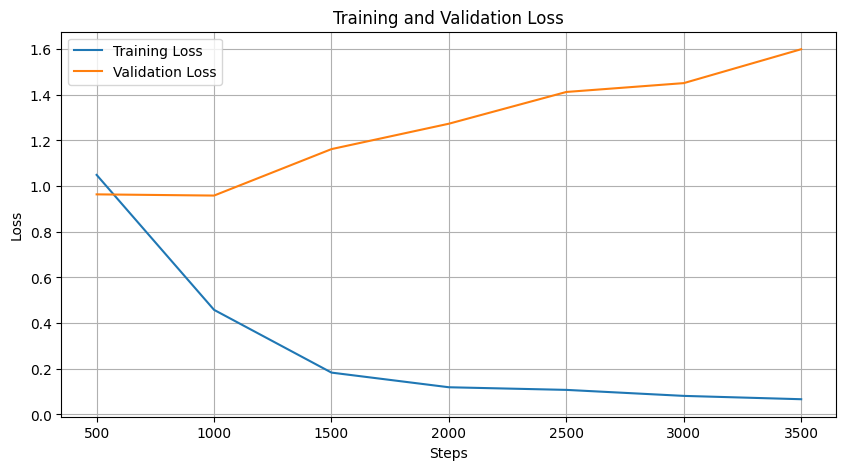

In [46]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

def plot_training_loss(log_dir):
    event_files = [os.path.join(log_dir, f) for f in os.listdir(log_dir) if 'events' in f]
    if not event_files:
        raise ValueError("No event files found in log directory.")

    for event_file in event_files:
        losses = {'Step': [], 'Training Loss': [], 'Validation Loss': []}
        for e in tf.compat.v1.train.summary_iterator(event_file):
            for v in e.summary.value:
                if v.tag == 'train/loss':
                    losses['Training Loss'].append(v.simple_value)
                    losses['Step'].append(e.step)
                elif v.tag == 'eval/loss':
                    losses['Validation Loss'].append(v.simple_value)

        if losses['Step']:
            df = pd.DataFrame(losses).set_index('Step')
            plt.figure(figsize=(10, 5))
            plt.plot(df['Training Loss'], label='Training Loss')
            plt.plot(df['Validation Loss'], label='Validation Loss')
            plt.xlabel('Steps')
            plt.ylabel('Loss')
            plt.title('Training and Validation Loss')
            plt.legend()
            plt.grid(True)
            plt.show()

# Î°úÍ∑∏ ÎîîÎ†âÌÜ†Î¶¨Î•º ÏßÄÏ†ïÌïòÏó¨ Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plot_training_loss('./logs')

In [47]:
test_dataset = encoded_dataset['test']

In [48]:
# ÌèâÍ∞Ä Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎåÄÌïú ÏòàÏ∏° ÏàòÌñâ
predictions = trainer.predict(test_dataset)

In [49]:
# ÏòàÏ∏°Îêú Î†àÏù¥Î∏îÍ≥º Ïã§Ï†ú Î†àÏù¥Î∏î Ï∂îÏ∂ú
predicted_labels = np.argmax(predictions.predictions, axis=1)
true_labels = predictions.label_ids

# Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ F1 Ïä§ÏΩîÏñ¥ Í≥ÑÏÇ∞
class_f1_scores = f1_score(true_labels, predicted_labels, average=None)

# ÌÅ¥ÎûòÏä§Î≥Ñ F1 Ïä§ÏΩîÏñ¥ Ï∂úÎ†•
for class_id, f1_score_value in enumerate(class_f1_scores):
    print(f"Class {class_id} F1 Score: {f1_score_value}")

Class 0 F1 Score: 0.7072633895818049
Class 1 F1 Score: 0.6915662650602409
Class 2 F1 Score: 0.9550000000000001
Class 3 F1 Score: 0.7482419127988749
Class 4 F1 Score: 0.6915351506456241
Class 5 F1 Score: 0.7663280116110304
Class 6 F1 Score: 0.7455621301775147
Class 7 F1 Score: 0.788135593220339
Class 8 F1 Score: 0.6652267818574514


In [50]:
trainer.save_model('/content/drive/MyDrive/models/CCIT_graphcodebert_N:N(feature)(05-20)')

In [51]:
import pandas as pd

df2 = pd.read_csv("/content/drive/MyDrive/data/MSR+julite+Div_final_test(2500cut).csv")

In [52]:
df2.head(50)

CWE ID  vul lang                                               code  \
0   CWE-119    1    c  enum void func( const char *name, struct group...   
1   CWE-119    1    c  void func(struct sshbuf *m, struct ssh *ssh, i...   
2   CWE-119    1    c  void func(Jbig2HuffmanState *hs, int offset) {...   
3   CWE-119    1    c  void func(struct file *file, unsigned long add...   
4   CWE-119    1    c  void func(StyleDifference diff, const RenderSt...   
5   CWE-119    1    c  long long Chapters::Atom::GetStartTimecode() c...   
6   CWE-119    1    c   void func(struct atusb *atusb) { struct usb_d...   
7   CWE-119    1    c  void func(TGAContext *ctx, GError **err) { TGA...   
8   CWE-119    1    c   void func( FT_Error error_code ) { FT_Face fa...   
9   CWE-119    1    c  void func( const ExtensionIdSet* extensions, i...   
10  CWE-119    1    c   void func(const struct optee_msg_param_rmem *...   
11  CWE-119    1    c   void func(TIFF* tif, uint8* cp0, tmsize_t cc)...   
12  CWE-119    1    c  void func(struct device *dev, struct device_at...   
13  CWE-119    1    c  long void func(IMkvReader* pReader, long long ...   
14  CWE-119    1    c  void func(struct hid_device *hdev, struct hid_...   
15  CWE-119    1    c  void func(png_structpp ptr_ptr, png_const_char...   
16  CWE-119    1    c   virtual void func() { if (m_settings.enableCo...   
17  CWE-119    1    c  void func( IMkvReader* pReader, long long pos,...   
18  CWE-119    1    c  void Chapters::Atom::ShallowCopy(Atom& rhs) co...   
19  CWE-119    1    c   FileEntrySyncvoid func(const String& path, co...   
20  CWE-119    1    c   virtual void func() { video_ = new libvpx_tes...   
21  CWE-119    1    c  void func(AVFilterLink *inlink, AVFrame *in) {...   
22  CWE-119    1    c                       void func( cJSON *item ) { }   
23  CWE-119    1    c   void func(png_bytep buf) { png_int_32 i = ((p...   
24  CWE-119    1    c  void func(journal_t *journal, struct buffer_he...   
25  CWE-125    1    c  void func(struct io_kiocb *req, unsigned int i...   
26  CWE-125    1    c  void func(OnigCodePoint code ARG_UNUSED, OnigE...   
27  CWE-125    1    c  void func(struct Configurable *config, const c...   
28  CWE-125    1    c  void func(const GURL& url, std::vector<Preconn...   
29  CWE-125    1    c  void func(netdissect_options *ndo, const struc...   
30  CWE-125    1    c  void func(NTLM_MESSAGE_FIELDS* fields) { if (f...   
31  CWE-125    1    c  void func(struct qedi_dbg_ctx *qedi, const cha...   
32  CWE-125    1    c  void func(int inLength, int maxLength, const s...   
33  CWE-125    1    c   void func( const PreconnectStats& stats, cons...   
34  CWE-125    1    c  void func(xmlParserCtxtPtr ctxt, const xmlChar...   
35  CWE-125    1    c  void func(txMachine* the) { txSlot* slot; txBo...   
36  CWE-125    1    c  void func(netdissect_options *ndo, register co...   
37  CWE-125    1    c  DeepScanLineInputFile::DeepScanLineInputFile (...   
38  CWE-125    1    c  void func(netdissect_options *ndo, const char ...   
39  CWE-125    1    c       void func(const char *str, ssize_t len) {  }   
40  CWE-125    1    c  void func(OnigCodePoint code, UChar *buf, Onig...   
41  CWE-125    1    c  void func(void) { int fd; struct filter_op *fo...   
42  CWE-125    1    c  void func(struct qedi_dbg_ctx *qedi, const cha...   
43  CWE-125    1    c  void func(struct ldb_context *ldb, const struc...   
44  CWE-125    1    c  void func(parser_state *ps, int type, char *st...   
45  CWE-125    1    c  void func(VncState *vs, uint8_t *buf, int w, i...   
46  CWE-125    1    c  void func(Walker *pWalker, Expr *pExpr) { int ...   
47  CWE-125    1    c   void Compute(OpKernelContext* ctx) override {...   
48  CWE-125    1    c  void func(Gimp *gimp, GInputStream *input, GFi...   
49  CWE-125    1    c   void convert(const char * in0, int size, Char...   

    labels  
0        0  
1        0  
2        0  
3        0  
4        0  
5        0  
6        0  
7        0  
8        0 

In [53]:
df2 = df2[['vul', 'code']]

In [54]:
import re

def preprocess2(df2, file_name):
    # Î©ÄÌã∞ ÎùºÏù∏ Ï£ºÏÑù Ï†úÍ±∞
    df2['code'] = df2['code'].replace(re.compile(r'/\*.*?\*/', re.DOTALL), "", regex=True)
    # Ïã±Í∏Ä ÎùºÏù∏ Ï£ºÏÑù Ï†úÍ±∞
    df2['code'] = df2['code'].replace(re.compile(r'//.*?\n'), "", regex=True)
    # angle bracketsÎ•º ÏÇ¨Ïö©ÌïòÎäî include Ï†úÍ±∞
    df2['code'] = df2['code'].replace(re.compile(r'#include .*?\n'), "", regex=True)
    df2['code'] = df2['code'].replace(re.compile(r'#include "*.*?\n'), "", regex=True)
    # Îß§ÌÅ¨Î°ú Ï†ïÏùò Ï†úÍ±∞
    df2['code'] = df2['code'].replace(re.compile(r'#define .*?\n'), "", regex=True)
    # Ï†ÑÏ≤òÎ¶¨ ÏßÄÏãúÎ¨∏ Ï†úÍ±∞
    df2['code'] = df2['code'].replace(re.compile(r'#undef\s+\w+'), "", regex=True)
    df2['code'] = df2['code'].replace(re.compile(r'#if\s+\w+'), "", regex=True)
    df2['code'] = df2['code'].replace(re.compile(r'#else\s+\w+'), "", regex=True)
    df2['code'] = df2['code'].replace(re.compile(r'#elif\s+\w+'), "", regex=True)
    df2['code'] = df2['code'].replace(re.compile(r'#endif'), "", regex=True)
    # ÌÉ≠Í≥º Ïó¨Îü¨ Í≥µÎ∞±ÏùÑ ÌïòÎÇòÏùò Í≥µÎ∞±ÏúºÎ°ú
    df2['code'] = df2['code'].replace(re.compile(r'[\t ]+'), " ", regex=True)
    # Ïó¨Îü¨ Ï§ÑÎ∞îÍøàÏùÑ ÌïòÎÇòÎ°ú
    df2['code'] = df2['code'].replace(re.compile(r'\n\s*\n'), "", regex=True)
    df2['code'] = df2['code'].replace(re.compile(r'\n'), "", regex=True)
    df2['code'] = df2['code'].replace(re.compile(r'return*.*?;'), "", regex=True)
    df2['code'] = df2['code'].replace(re.compile(r'return;'), "", regex=True)
    # void func Î°ú Î≥ÄÍ≤Ω
    df2['code'] = df2['code'].replace(re.compile(r'\b([a-zA-Z_]\w*)\s+([a-zA-Z_]\w*)\s*\(([^)]*)\)\s*{'), r"void func(\3){", regex=True)
    # Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ CSV ÌååÏùºÎ°ú Ï†ÄÏû•
    df2.to_csv(file_name, index=False)
    return df2  # ÏàòÏ†ïÎêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î∞òÌôò


def tokenized(examples):
  return tokenizer(examples['code'], pad_to_max_length=True, max_length=MAX_LEN,truncation=True, return_token_type_ids=True)

In [55]:
preprocess2(df2,"preprocess2.csv")
dataset = load_dataset("csv",data_files="preprocess2.csv")['train']
encoded_dataset2 = dataset.map(tokenized,remove_columns=['code'],batched=True)
encoded_dataset2=encoded_dataset2.rename_column(original_column_name='vul',new_column_name='labels')

Generating train split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/225 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2699: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [56]:
trainer.predict(encoded_dataset2, metric_key_prefix="eval")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


PredictionOutput(predictions=array([[ 4.660657  , -2.5705369 ,  0.11959469, ..., -1.3355134 ,
         1.689577  , -1.9967346 ],
       [ 6.5797296 , -0.95388   , -1.8824875 , ..., -0.57528645,
         0.3256358 , -2.6369462 ],
       [ 4.345282  , -0.58350223, -2.8403087 , ..., -1.9719067 ,
         1.0668843 , -0.63878554],
       ...,
       [ 0.9006021 ,  0.13993444, -1.5811958 , ..., -2.5514946 ,
         3.5459676 , -3.3546348 ],
       [-0.49093464, -1.0063568 , -0.49914032, ..., -1.2310026 ,
        -0.22677183, -2.1919858 ],
       [ 0.47321862, -2.5041473 , -0.7619844 , ..., -2.5141613 ,
        -0.22338876, -1.5975523 ]], dtype=float32), label_ids=array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 